___
# Ciência dos Dados - PROJETO 1


Gabriel Heusi Pereira Bueno de Camargo


## A evolução na alfabetização dos jovens brasileiros entre as raças.

___
## Introdução
Como base em uma pergunta guia, sendo ela: "Como se comportou e evoluiu a educação no Brasil de 2011 a 2015 de acordo com a raça e a renda mensal?", a partir dessa deve-se analisar as diversas pessoas da tabela inicial e realizar filtragens, para analisar de maneira fria como se comportam essas variáveis. Já que por exemplo há indivíduos que já frequentaram a escola, mas não no momento das entrevistas e há ainda aqueles que realmente não chegaram a frequentar algum tipo de ensino. Para isso criou-se diversas variáveis novas e assim tabelas e gráficos com base nisso, afim de chegar-se a uma conclusão final de como se deu essa evolução no intervalo de 2011 a 2015.



___
## 1) Filtragens iniciais das base de dados (2011 e 2015)

In [109]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import zeros_like

In [110]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Gabriel Camargo\Documents\Insper - Engenharia\Ciência dos Dados - DP\PES2011csv


In [111]:
base1 = pd.read_csv('PES2011.csv',sep=',')
base5 = pd.read_csv('PES2015.csv',sep=',')

In [112]:
base1.V0101=base1.V0101.astype("int")
base5.V0101=base5.V0101.astype("int")

## Definição de uma nova variável, 'Raça', de maneira categórica

In [113]:
base1.loc[(base1.V0404==2),"RAÇA"]="Branca"
base1.loc[(base1.V0404==4),"RAÇA"]="Preta"
base1.loc[(base1.V0404==6),"RAÇA"]="Amarela"
base1.loc[(base1.V0404==8),"RAÇA"]="Parda"
base1.loc[(base1.V0404==0),"RAÇA"]="Indígena"
base1.RAÇA=base1.RAÇA.astype("category")

In [114]:
base5.loc[(base5.V0404==2),"RAÇA"]="Branca"
base5.loc[(base5.V0404==4),"RAÇA"]="Preta"
base5.loc[(base5.V0404==6),"RAÇA"]="Amarela"
base5.loc[(base5.V0404==8),"RAÇA"]="Parda"
base5.loc[(base5.V0404==0),"RAÇA"]="Indígena"
base5.RAÇA=base5.RAÇA.astype("category")

## Criação da variável de Faixa Etária, entre as três principais

In [115]:
base1.loc[(base1.V8005<20),"FAIXA_ETÁRIA"]="JOVEM"
base1.loc[(base1.V8005>20)&(base1.V8005<60),"FAIXA_ETÁRIA"]="ADULTO"
base1.loc[(base1.V8005>59),"FAIXA_ETÁRIA"]="IDOSO"

In [116]:
base5.loc[(base5.V8005<20),"FAIXA_ETÁRIA"]="JOVEM"
base5.loc[(base5.V8005>20)&(base5.V8005<60),"FAIXA_ETÁRIA"]="ADULTO"
base5.loc[(base5.V8005>59),"FAIXA_ETÁRIA"]="IDOSO"

## Nova variável, a principal da análise, que lida com alfabetização básica dos entrevistados.

In [117]:
base1.loc[(base1.V0601==1) & (base1.V0602==2),'Alfabetização_Básica'] = 'Sim'
base1.loc[(base1.V0601==1) & (base1.V0602==4),'Alfabetização_Básica'] = 'Sim'
base1.loc[(base1.V0601==3) & (base1.V0602==2),'Alfabetização_Básica'] = 'Não'
base1.loc[(base1.V0601==3) & (base1.V0602==4),'Alfabetização_Básica'] = 'Não'
base1.V0602=base1.V0601.astype("category")
base1.V0602=base1.V0602.astype("category")

In [118]:
base5.loc[(base5.V0601==1) & (base5.V0602==2),'Alfabetização_Básica'] = 'Sim'
base5.loc[(base5.V0601==1) & (base5.V0602==4),'Alfabetização_Básica'] = 'Sim'
base5.loc[(base5.V0601==3) & (base5.V0602==2),'Alfabetização_Básica'] = 'Não'
base5.loc[(base5.V0601==3) & (base5.V0602==4),'Alfabetização_Básica'] = 'Não'
base5.V0601=base5.V0601.astype("category")
base5.V0602=base5.V0602.astype("category")

## Definição da última variável de interesse, sobre o nível do curso, até para aqueles que podem ter respondido não para as perguntas acima, ou seja, pessoa que não frequenta escola ou creche no momento da entrevista, mas já o fez anteriormente.

In [119]:
base1.loc[(base1.V6007>9),"Nível_Cursado"] = "Alfabetizado"
base1.loc[(base1.V6007<3),"Nível_Cursado"] = "Primário"
base1.loc[(base1.V6007<5)&(base1.V6007>2),"Nível_Cursado"] = "Secundário"
base1.loc[(base1.V6007==5),"Nível_Cursado"] = "Ensino Médio"
base1.loc[(base1.V6007<8)&(base1.V6007>5),"Nível_Cursado"] = "Educação Adulta"
base1.loc[(base1.V6007==8),"Nível_Cursado"] = "Superior"
base1.loc[(base1.V6007==9),"Nível_Cursado"] = "Pós Graduação"

In [120]:
base5.loc[(base5.V6007>9),"Nível_Cursado"] = "Alfabetizado"
base5.loc[(base5.V6007<3),"Nível_Cursado"] = "Primário"
base5.loc[(base5.V6007<5)&(base5.V6007>2),"Nível_Cursado"] = "Secundário"
base5.loc[(base5.V6007==5),"Nível_Cursado"] = "Ensino Médio"
base5.loc[(base5.V6007<8)&(base5.V6007>5),"Nível_Cursado"] = "Educação Adulta"
base5.loc[(base5.V6007==8),"Nível_Cursado"] = "Superior"
base5.loc[(base5.V6007==9),"Nível_Cursado"] = "Pós Graduação"

In [121]:
base1=base1.loc[base1.V4721<500000,["V0101","RAÇA","FAIXA_ETÁRIA","V4721","Alfabetização_Básica","Nível_Cursado","V4838"]]
base1.columns=["ANO","RAÇA","FAIXA_ETÁRIA","RENDA",'Alfabetização_Básica',"Nível_Cursado","Anos_de_Estudo"]
base1

,ANO,RAÇA,FAIXA_ETÁRIA,RENDA,Alfabetização_Básica,Nível_Cursado,Anos_de_Estudo
4,2011,Preta,ADULTO,5845.0,Sim,Ensino Médio,4
5,2011,Preta,ADULTO,5845.0,Sim,Ensino Médio,5
6,2011,Preta,JOVEM,5845.0,Sim,NaN,4
7,2011,Parda,JOVEM,5845.0,Sim,NaN,3
10,2011,Parda,ADULTO,6000.0,Sim,Ensino Médio,5
11,2011,Parda,ADULTO,6000.0,Sim,Primário,3
12,2011,Parda,JOVEM,6000.0,Sim,NaN,4
13,2011,Parda,JOVEM,6000.0,Sim,NaN,3
14,2011,Parda,JOVEM,6000.0,Não,NaN,1
15,2011,Parda,IDOSO,6000.0,Sim,Primário,2


In [122]:
base5=base5.loc[base5.V4721<500000,["V0101","RAÇA","FAIXA_ETÁRIA","V4721","Alfabetização_Básica","Nível_Cursado","V4838"]]
base5.columns=["ANO","RAÇA","FAIXA_ETÁRIA","RENDA",'Alfabetização_Básica',"Nível_Cursado","Anos_de_Estudo"]
base5

,ANO,RAÇA,FAIXA_ETÁRIA,RENDA,Alfabetização_Básica,Nível_Cursado,Anos_de_Estudo
0,2015,Parda,ADULTO,800.0,Sim,Ensino Médio,5
1,2015,Branca,ADULTO,1150.0,Sim,Ensino Médio,5
2,2015,Parda,ADULTO,4760.0,Sim,NaN,5
3,2015,Parda,ADULTO,4760.0,Sim,Superior,5
4,2015,Parda,JOVEM,4760.0,Sim,NaN,2
5,2015,Parda,JOVEM,4760.0,Sim,NaN,2
6,2015,Parda,JOVEM,4760.0,Não,NaN,1
7,2015,Parda,JOVEM,4760.0,Sim,Ensino Médio,5
8,2015,Branca,ADULTO,5800.0,Sim,Secundário,3
9,2015,Parda,IDOSO,5800.0,Sim,Primário,2


## 2) Análise e Resultados

### Para aqueles que apresentam certo grau de alfabetização deve-se observar a distribuição da mesma mais a fundo

In [123]:
base1.Alfabetização_Básica.value_counts()

Sim    283157
Não     55583
Name: Alfabetização_Básica, dtype: int64

In [124]:
base5.Alfabetização_Básica.value_counts()

Sim    296931
Não     51953
Name: Alfabetização_Básica, dtype: int64

Sim    83.6
Não    16.4
Name: Alfabetização_Básica, dtype: float64 

Sim    85.1
Não    14.9
Name: Alfabetização_Básica, dtype: float64 



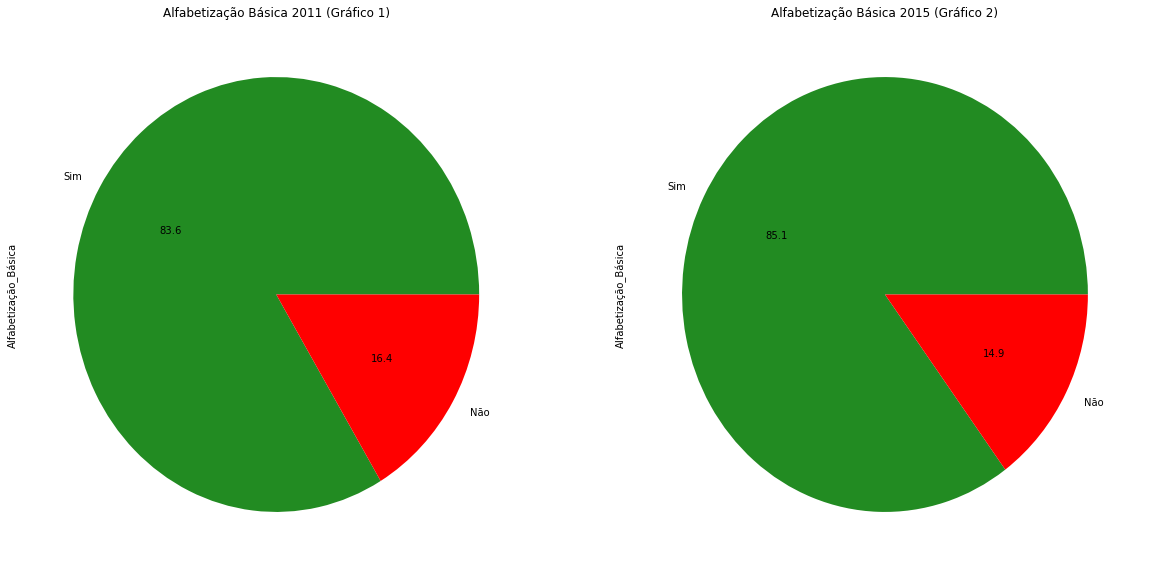

In [125]:
fig = plt.figure(figsize=(20, 10))
graf1 = (base1.Alfabetização_Básica.value_counts(sort=False, normalize=True)*100).round(decimals=1).reindex(['Sim','Não'])
print(graf1,'\n')
plt.subplot(121)
plot = graf1.plot(kind='pie',autopct='%0.1f',title="Alfabetização Básica 2011 (Gráfico 1)",colors=['forestgreen','red'])

graf2 = (base5.Alfabetização_Básica.value_counts(sort=False, normalize=True)*100).round(decimals=1).reindex(['Sim','Não'])
print(graf2,'\n')
plt.subplot(122)
plot = graf2.plot(kind='pie',autopct='%0.1f',title="Alfabetização Básica 2015 (Gráfico 2)",colors=['forestgreen','red'])

### Esses dois gráficos demonstram um avanço na educação brasileira entre 2011 e 2015, ou seja aumentou-se a tanto percentualmente quanto em valores absolutos o número de pessoas que possuem alfabetização básica.

## Análise inicial sobre a distribuição da alfabetização de acordo com a raça dos entrevistados, a partir disso deve-se observar aquelas que apresentarem percentualmente menor índice de alfabetização.

Alfabetização Básica,Não,Sim,All
RAÇA,,,
Branca,20684,129033,149717
Preta,4807,23855,28662
Amarela,181,1496,1677
Parda,29475,127483,156958
Indígena,436,1290,1726


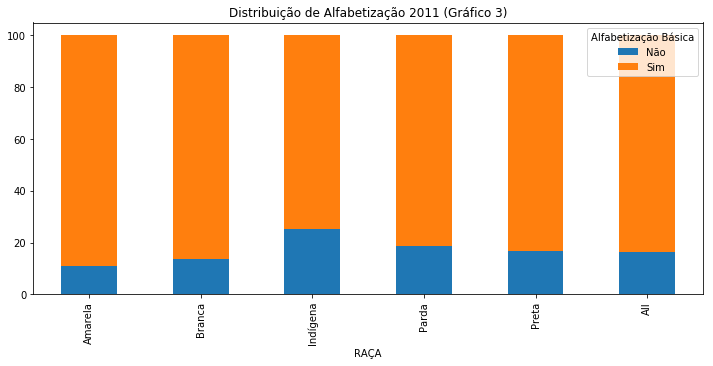

In [126]:
tb11= (pd.crosstab(base1.RAÇA,base1.Alfabetização_Básica,margins=True,rownames=["RAÇA"],colnames=["Alfabetização Básica"],normalize='index')*100).round(decimals=1)
plot = tb11.plot(kind="bar",stacked=True,title="Distribuição de Alfabetização 2011 (Gráfico 3)",figsize=(12,5))

abs11=pd.crosstab(base1.RAÇA,base1.Alfabetização_Básica, margins=True, rownames=['RAÇA'], colnames=['Alfabetização Básica'])
abs11=abs11.loc[['Branca','Preta','Amarela','Parda','Indígena']]
abs11

Alfabetização Básica,Não,Sim,All
RAÇA,,,
Branca,18538,126062,144600
Preta,4606,27955,32561
Amarela,93,1200,1293
Parda,28355,140511,168866
Indígena,359,1203,1562


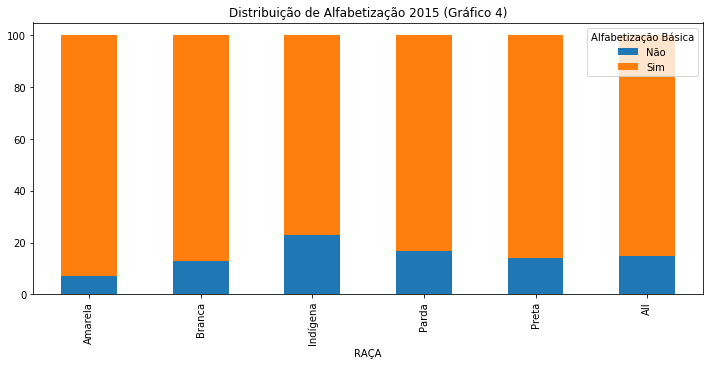

In [127]:
tb15= (pd.crosstab(base5.RAÇA,base5.Alfabetização_Básica,margins=True,rownames=["RAÇA"],colnames=["Alfabetização Básica"],normalize='index')*100).round(decimals=1)
plot = tb15.plot(kind="bar",stacked=True,title="Distribuição de Alfabetização 2015 (Gráfico 4)",figsize=(12,5))

abs15=pd.crosstab(base5.RAÇA,base5.Alfabetização_Básica, margins=True, rownames=['RAÇA'], colnames=['Alfabetização Básica'])
abs15=abs15.loc[['Branca','Preta','Amarela','Parda','Indígena']]
abs15

### Para aqueles que apresentaram nível de alfabetização, classificado como "Sim", agora deseja se analisar como é essa distribuição de acordo com a faixa de renda e a o nível cursado, já para aqueles que não apresentaram, ou seja responderam como "Não", observar se realmente não houve nenhum tipo de alfabetização ou se já ocorreu anteriormente, mas atualmente não frequenta nenhuma instituição de ensino. Portanto será analisado anos de estudo em relação a faixa etária.

[0, 250)         4.8
[250, 500)       4.3
[500, 750)      16.5
[750, 1000)      9.0
[1000, 1250)    13.7
[1250, 1500)     6.1
[1500, 1750)     5.8
[1750, 2000)     6.5
[2000, 2250)     4.3
[2250, 2500)     5.2
[2500, 2750)     4.7
[2750, 3000)     3.4
[3000, 3250)     1.1
[3250, 3500)     2.3
[3500, 3750)     2.4
[3750, 4000)     1.5
[4000, 4250)     1.1
[4250, 4500)     1.0
[4500, 4750)     2.0
[4750, 5000)     0.2
[5000, 5250)     2.1
[5250, 5500)     0.2
[5500, 5750)     0.2
[5750, 6000)     0.7
[6000, 6250)     0.8
Name: RENDA, dtype: float64 



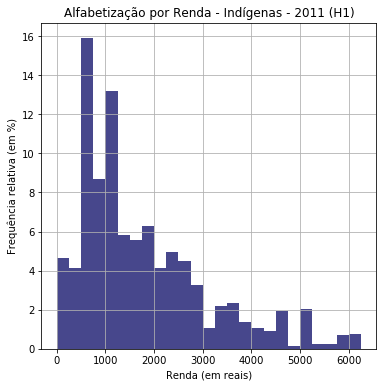

In [128]:
faixa = np.arange(0,6500,250)
frenda = pd.cut(base1.RENDA[(base1.Alfabetização_Básica=='Sim')&(base1.RAÇA=="Indígena")], bins=faixa, right=False)
t1 = (frenda.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t1,"\n")

plot = base1.RENDA[(base1.Alfabetização_Básica=='Sim')&(base1.RAÇA=="Indígena")].plot.hist(bins=faixa,title="Alfabetização por Renda - Indígenas - 2011 (H1)", weights=zeros_like(base1.RENDA[(base1.Alfabetização_Básica=='Sim')&(base1.RAÇA=="Indígena")])+1./base1.RENDA[(base1.Alfabetização_Básica=='Sim')&(base1.RAÇA=="Indígena")].size*100, figsize=(6, 6),color="midnightblue", alpha=0.8)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.grid()

plt.show()

[0, 250)         4.1
[250, 500)       4.7
[500, 750)      14.7
[750, 1000)      9.7
[1000, 1250)    13.2
[1250, 1500)     8.4
[1500, 1750)     9.2
[1750, 2000)     5.9
[2000, 2250)     6.1
[2250, 2500)     3.7
[2500, 2750)     3.7
[2750, 3000)     2.4
[3000, 3250)     2.9
[3250, 3500)     1.6
[3500, 3750)     1.8
[3750, 4000)     1.2
[4000, 4250)     1.5
[4250, 4500)     0.8
[4500, 4750)     1.0
[4750, 5000)     0.5
[5000, 5250)     0.9
[5250, 5500)     0.4
[5500, 5750)     0.5
[5750, 6000)     0.3
[6000, 6250)     0.6
Name: RENDA, dtype: float64 



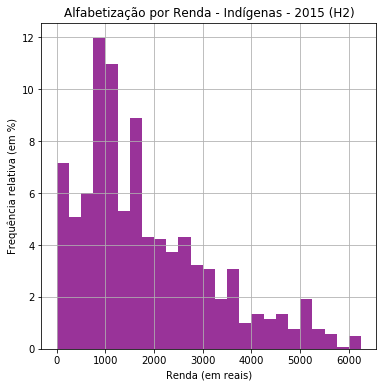

In [129]:
frenda2 = pd.cut(base5.RENDA[(base5.Alfabetização_Básica=='Sim')&(base5.RAÇA=="Indígena")], bins=faixa, right=False)
t2 = (frenda2.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t4,"\n")

plot = base5.RENDA[(base5.Alfabetização_Básica=='Sim')&(base5.RAÇA=="Indígena")].plot.hist(bins=faixa,title="Alfabetização por Renda - Indígenas - 2015 (H2)", weights=zeros_like(base5.RENDA[(base5.Alfabetização_Básica=='Sim')&(base5.RAÇA=="Indígena")])+1./base5.RENDA[(base5.Alfabetização_Básica=='Sim')&(base5.RAÇA=="Indígena")].size*100, figsize=(6, 6),color='purple', alpha=0.8)
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.grid()

[0, 250)         4.1
[250, 500)       4.7
[500, 750)      14.7
[750, 1000)      9.7
[1000, 1250)    13.2
[1250, 1500)     8.4
[1500, 1750)     9.2
[1750, 2000)     5.9
[2000, 2250)     6.1
[2250, 2500)     3.7
[2500, 2750)     3.7
[2750, 3000)     2.4
[3000, 3250)     2.9
[3250, 3500)     1.6
[3500, 3750)     1.8
[3750, 4000)     1.2
[4000, 4250)     1.5
[4250, 4500)     0.8
[4500, 4750)     1.0
[4750, 5000)     0.5
[5000, 5250)     0.9
[5250, 5500)     0.4
[5500, 5750)     0.5
[5750, 6000)     0.3
[6000, 6250)     0.6
Name: RENDA, dtype: float64 



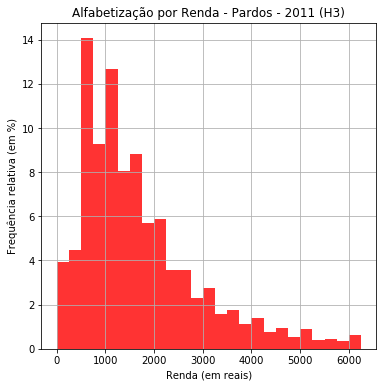

In [130]:
frenda3 = pd.cut(base1.RENDA[(base1.Alfabetização_Básica=='Sim')&(base1.RAÇA=="Parda")], bins=faixa, right=False)
t3 = (frenda3.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t3,"\n")

plot = base1.RENDA[(base1.Alfabetização_Básica=='Sim')&(base1.RAÇA=="Parda")].plot.hist(bins=faixa,title="Alfabetização por Renda - Pardos - 2011 (H3)", weights=zeros_like(base1.RENDA[(base1.Alfabetização_Básica=='Sim')&(base1.RAÇA=="Parda")])+1./base1.RENDA[(base1.Alfabetização_Básica=='Sim')&(base1.RAÇA=="Parda")].size*100, figsize=(6, 6), alpha=0.8,color="r")
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.grid()
plt.show()

[0, 250)         4.1
[250, 500)       4.7
[500, 750)      14.7
[750, 1000)      9.7
[1000, 1250)    13.2
[1250, 1500)     8.4
[1500, 1750)     9.2
[1750, 2000)     5.9
[2000, 2250)     6.1
[2250, 2500)     3.7
[2500, 2750)     3.7
[2750, 3000)     2.4
[3000, 3250)     2.9
[3250, 3500)     1.6
[3500, 3750)     1.8
[3750, 4000)     1.2
[4000, 4250)     1.5
[4250, 4500)     0.8
[4500, 4750)     1.0
[4750, 5000)     0.5
[5000, 5250)     0.9
[5250, 5500)     0.4
[5500, 5750)     0.5
[5750, 6000)     0.3
[6000, 6250)     0.6
Name: RENDA, dtype: float64 



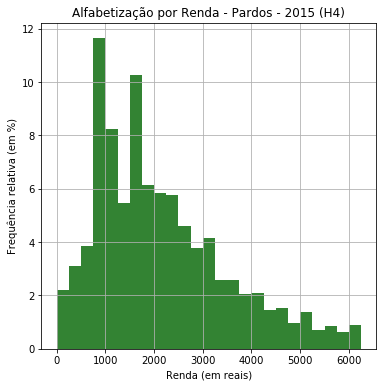

In [131]:
frenda4 = pd.cut(base1.RENDA[(base1.Alfabetização_Básica=='Sim')&(base1.RAÇA=="Parda")], bins=faixa, right=False)
t4 = (frenda4.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(t4,"\n")

plot = base5.RENDA[(base5.Alfabetização_Básica=='Sim')&(base5.RAÇA=="Parda")].plot.hist(bins=faixa,title="Alfabetização por Renda - Pardos - 2015 (H4)", weights=zeros_like(base5.RENDA[(base5.Alfabetização_Básica=='Sim')&(base5.RAÇA=="Parda")])+1./base5.RENDA[(base5.Alfabetização_Básica=='Sim')&(base5.RAÇA=="Parda")].size*100, figsize=(6, 6), alpha=0.8,color="darkgreen")
plt.ylabel('Frequência relativa (em %)')
plt.xlabel('Renda (em reais)')
plt.grid()
plt.show()

## Os quatro histogramas apresentados acima mostram algo que já era de certa forma esperado, ou seja uma distribuição das pessoas não alfabetizadas nas faixas de rendas mais baixas, iniciando em 0 até1250, com intervalo de 250 reais. Isso mostra um problema para pessoas de classes mais baixas.

Alfabetização_Básica           Não    Sim
Nível_Cursado   FAIXA_ETÁRIA             
Alfabetizado    ADULTO        54.7   45.3
                IDOSO         57.5   42.5
                JOVEM         92.5    7.5
Educação Adulta ADULTO         0.0  100.0
                IDOSO          0.0  100.0
                JOVEM          0.0  100.0
Ensino Médio    ADULTO         0.0  100.0
                IDOSO          0.0  100.0
                JOVEM          0.0  100.0
Primário        ADULTO        11.0   89.0
                IDOSO         10.8   89.2
                JOVEM          0.0  100.0
Pós Graduação   ADULTO         0.0  100.0
                IDOSO          0.0  100.0
Secundário      ADULTO         5.1   94.9
                IDOSO          1.0   99.0
                JOVEM          4.4   95.6
Superior        ADULTO         0.0  100.0
                IDOSO          0.0  100.0
                JOVEM          0.0  100.0 



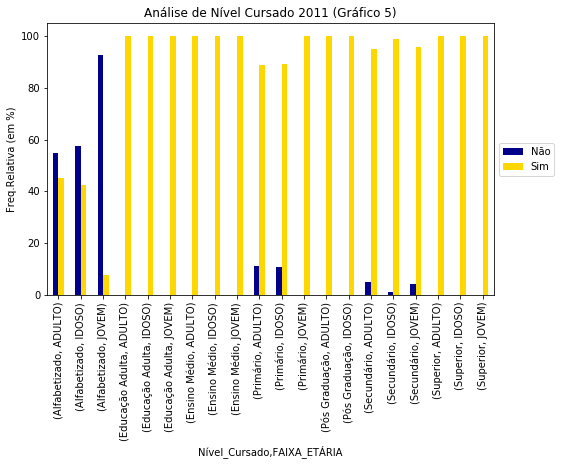

In [132]:
cross1=(pd.crosstab([base1.Nível_Cursado, base1.FAIXA_ETÁRIA],base1.Alfabetização_Básica, normalize='index')*100).round(decimals=1)
cross1
print(cross1,'\n')
plot = cross1.plot(kind='bar',title="Análise de Nível Cursado 2011 (Gráfico 5)",figsize=(10,5),color=("darkblue","gold"))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

Alfabetização_Básica           Não    Sim
Nível_Cursado   FAIXA_ETÁRIA             
Alfabetizado    ADULTO        70.0   30.0
                IDOSO         66.3   33.7
                JOVEM         93.6    6.4
Educação Adulta ADULTO         0.0  100.0
                IDOSO          0.0  100.0
                JOVEM          0.0  100.0
Ensino Médio    ADULTO         0.0  100.0
                IDOSO          0.0  100.0
                JOVEM          0.0  100.0
Primário        ADULTO        13.6   86.4
                IDOSO         11.2   88.8
Pós Graduação   ADULTO         0.0  100.0
                IDOSO          0.0  100.0
Secundário      ADULTO         5.4   94.6
                IDOSO          2.7   97.3
                JOVEM          3.9   96.1
Superior        ADULTO         0.0  100.0
                IDOSO          0.0  100.0
                JOVEM          0.0  100.0 



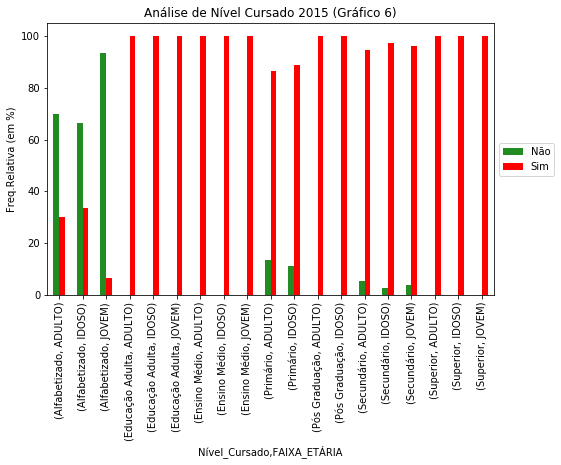

In [133]:
cross2=(pd.crosstab([base5.Nível_Cursado, base5.FAIXA_ETÁRIA],base5.Alfabetização_Básica, normalize='index')*100).round(decimals=1)
cross2
print(cross2,'\n')
plot = cross2.plot(kind='bar',title="Análise de Nível Cursado 2015 (Gráfico 6)",figsize=(10,5),color=("forestgreen","red"))
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Freq.Relativa (em %)')
plt.show()

___
## 3) Conclusão 

        Com a definição do tema e a pergunta-guia definida como demonstrada na introdução do projeto, buscou-se nas bases de 2011 e 2015 as variáveis que poderiam demonstrar uma análise bem explicativa de como se comportou a educação no Brasil entre o intervalo de análise. Dessa forma é importante ressaltar o impacto real de cada uma delas na real alfabetização dos entrebistados, por exemplo a renda, já se espera que as classes mais baixas, por conta até da desigualdade social, tenha menor acesso à escolaridade no país, mas mesmo assim era importante demonstrar isso com dados.
        Com as variáveis inicialmente definidas, na filtragem inicial (1), iniciou-se as primeiras representações observando que já houve uma melhora nos números tanto absolutos quanto percentuais da alfabetização entre 2011 e 2015, como apresentados pelos gráficos 1 e 2. A seguir partiu-se para uma análise mais profunda, como seria esta de acordo com a raça do entrevistado e quais delas, optou-se por duas, tinha menor acesso a alfabetização no Brasil. Os gráficos 3 e 4, mostraram então uma permanência das raças mais "prejudicadas", sendo elas os pardos e indígenas. Sabendo disso valia ainda observar como se dava a distribuição destas raças quanto a renda mensal, e como dito no início desta conclusão, se mostrou aquilo que já se esperava, uma predominância das classes mais baixas respondendo "Não" para as perguntas que definiam a variável "Alfabetização_Básica", contendo duas perguntas simples, se o entrevistado saber ler e escrever e se este frequenta escola ou creche. 
        Era necessário por fim, observar como era o nível do ensino da população brasileira, e isso de acordo também com a faixa etária, isto porque, em teoria os jovens ainda não teriam tempo suficiente para cursos mais avançados. Ainda vale destacar o fato de que a segunda pergunta de "Alfabetização_Básica" demonstrava uma certa incoveniência, afinal aqueles que responderam "Não" para tal, poderiam realmente não frequentar escola naquele momento, mas já anteriormente, principalmente para adultos e idosos. Portanto, para "resolver" isto, foi necessário a partir de gráficos do tipo "Crosstab", ou seja cruzamento de diferentes dados de variáveis, observar aqueles que realmente não frequentaram nenhum tipo de instituição ou anteriormente já a frequentaram e por isso o uso da varíavel "Nível_Cursado" nesses dois crosstabs, chamados de gráfico 5 e 6. Um de cada ano, que na realidade não apresentou grande diferença entre os anos, mas mesmo assim mostrou que uma grande parte dos que não frequentavam escola ou creche no momento da entrevista, na verdade não teriam "Alfabetização_Básica" como "Não", na verdade já haviam frequentado algum tipo de ensino, e isso se mostra principalmente na faixa inicial, daqueles que não estavam em "Alfabetização_Básica" mas eram sim alfabetizados. 